<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/15_Advanced_%F0%9F%90%8D_Python_programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**15 Advanced 🐍 Python programs** By **Lovnish Verma** 😀

**Program 1.** Multithreaded Web Scraper with Requests & BeautifulSoup.

In [4]:
#The Python code provided is scraping the <title> tag from each URL.

# Specifically, this line extracts the title:
# title = soup.title.string if soup.title else "No Title Found"

# It looks for the <title> tag within the HTML and then extracts its text content.

import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor

def fetch_url(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        title = soup.title.string if soup.title else "No Title Found"
        print(f"{url}: {title}")
    except Exception as e:
        print(f"Error fetching {url}: {e}")

urls = [
    'https://www.python.org',
    'https://www.github.com',
    'https://www.stackoverflow.com',
    'https://realpython.com',
]

with ThreadPoolExecutor(max_workers=4) as executor:
    executor.map(fetch_url, urls)


https://www.python.org: Welcome to Python.org
https://www.stackoverflow.com: Just a moment...
https://www.github.com: GitHub · Build and ship software on a single, collaborative platform · GitHub
https://realpython.com: Python Tutorials – Real Python


**Program 2.** Custom Decorator for Logging Function Execution Time

In [5]:
import time
from functools import wraps

def log_time(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Function '{func.__name__}' executed in {end - start:.4f}s")
        return result
    return wrapper

@log_time
def process_data():
    time.sleep(2)
    print("Data processed.")

process_data()


Data processed.
Function 'process_data' executed in 2.0002s


**Program 3.** Asynchronous API Calls using aiohttp

In [6]:
import aiohttp
import asyncio

async def fetch(session, url):
    async with session.get(url) as response:
        print(f"{url}: {response.status}")
        return await response.text()

async def main():
    urls = ['https://httpbin.org/get', 'https://api.github.com', 'https://www.python.org']
    async with aiohttp.ClientSession() as session:
        tasks = [fetch(session, url) for url in urls]
        await asyncio.gather(*tasks)

# If you are in a Jupyter Notebook or IPython environment:
# You can simply await main() if there's an existing loop
await main()

https://www.python.org: 200
https://api.github.com: 200
https://httpbin.org/get: 200


**Program 4.** Machine Learning Model with scikit-learn

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")


Accuracy: 0.96


**Program 5.** Password Generator with Strength Options

In [8]:
import random
import string

def generate_password(length=12, strong=True):
    chars = string.ascii_letters + string.digits
    if strong:
        chars += string.punctuation
    return ''.join(random.choice(chars) for _ in range(length))

print("Generated Password:", generate_password(16))


Generated Password: "z*jXF'82l'VyH$.


**Program 6.** Face Detection using OpenCV

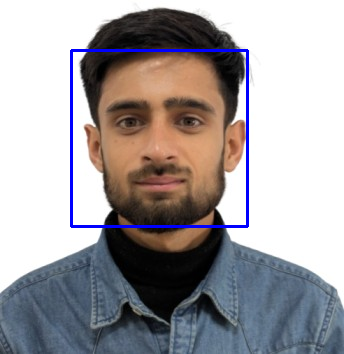

In [9]:
# Step 1: Install OpenCV (if not already installed)
!pip install opencv-python

# Step 2: Import necessary libraries
import cv2
from google.colab.patches import cv2_imshow  # For image display in Colab
import urllib.request

# Step 3: Download a sample image
url = 'https://cdn.glitch.me/project-avatar/453800ff-7ea9-4b66-81d4-3a5ae7f61059.png?1749476313024'
urllib.request.urlretrieve(url, 'LovnishVerma.jpg')

# Step 4: Load the Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Step 5: Read the image and convert to grayscale
img = cv2.imread('LovnishVerma.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 6: Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Step 7: Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Step 8: Display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


**Program 7.** Real-Time Weather Fetcher (API Integration)

In [10]:
import requests

city = input("Enter city: ")

url = "https://weatherapi-com.p.rapidapi.com/current.json"

querystring = {"q": city}

headers = {
    "X-RapidAPI-Key": "48b4ff1931msh5e006d4c3f36210p1b8d04jsn203e95aa9d55",
    "X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    data = response.json()
    location = data['location']['name']
    region = data['location']['region']
    country = data['location']['country']
    temp_c = data['current']['temp_c']
    condition = data['current']['condition']['text']

    print(f"{location}, {region}, {country} Weather: {condition}, Temp: {temp_c}°C")
else:
    print("City not found or API error!")


Enter city: Chandigarh
Chandigarh, Chandigarh, India Weather: Clear, Temp: 38.9°C


**Program 8.** Build and Query SQLite Database

In [11]:
import sqlite3

conn = sqlite3.connect('library.db')
c = conn.cursor()

c.execute('''CREATE TABLE IF NOT EXISTS books (id INTEGER PRIMARY KEY, title TEXT, author TEXT)''')
c.execute("INSERT INTO books (title, author) VALUES (?, ?)", ('1984', 'George Orwell'))
conn.commit()

for row in c.execute("SELECT * FROM books"):
    print(row)

conn.close()


(1, '1984', 'George Orwell')


**Program 9.** QR Code Generator & Reader

In [12]:
!pip install qrcode
import qrcode
import cv2

# Generate QR
data = "https://openai.com"
img = qrcode.make(data)
img.save("qrcode.png")

# Read QR
detector = cv2.QRCodeDetector()
image = cv2.imread("qrcode.png")
val, _, _ = detector.detectAndDecode(image)
print("Decoded QR:", val)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
Decoded QR: https://openai.com


**Program 10.** Automated Excel Report with Pandas and OpenPyXL

In [13]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Sales': [2500, 3000, 2000]
}

df = pd.DataFrame(data)
df.to_excel('report.xlsx', index=False)

print("Excel report generated.")


Excel report generated.


**Program 11.** Basic Blockchain in Python

In [14]:
import hashlib
import time

class Block:
    def __init__(self, index, timestamp, data, prev_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.prev_hash = prev_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        text = str(self.index) + self.timestamp + self.data + self.prev_hash
        return hashlib.sha256(text.encode()).hexdigest()

def create_genesis_block():
    return Block(0, str(time.time()), "Genesis Block", "0")

def next_block(last_block, data):
    return Block(last_block.index + 1, str(time.time()), data, last_block.hash)

blockchain = [create_genesis_block()]
previous_block = blockchain[0]

for i in range(1, 5):
    data = f"Block {i} Data"
    block = next_block(previous_block, data)
    blockchain.append(block)
    previous_block = block
    print(f"Block {block.index} added with hash: {block.hash}")


Block 1 added with hash: 00c9d2a7919c0a014b75a2325ccaef59835086094fba51ec44f8d3aef6027e07
Block 2 added with hash: 97801105f72f274f6fde6afbd7154ed7e83f7f262b9764202b29d2cf5b15d4c2
Block 3 added with hash: 748f29a73b92ebd9d7e6ffd2854e0979c94450ef5c71616d95980ac809af8fba
Block 4 added with hash: 300d277a95248a47af0e7b12d11df7a2c54ec3af9ddedf6d03cce1e0d7d40304


**Program 12.** Text Summarizer using HuggingFace Transformers


In [15]:
from transformers import pipeline

summarizer = pipeline("summarization")

article = """
OpenAI's GPT models are some of the most powerful large language models in the world.
They can generate human-like text and are used in a wide range of applications including chatbots, content generation, and code completion.
"""

summary = summarizer(article, max_length=40, min_length=10, do_sample=False)
print("Summary:", summary[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


Summary:  OpenAI's GPT models are some of the most powerful large language models in the world . They can generate human-like text and are used in a wide range of applications including chat


**Program 13.** Real-Time Stock Ticker using yfinance & rich

In [16]:
import yfinance as yf
from time import sleep
from rich.console import Console

console = Console()

for _ in range(5): # Runs 5 times
    try:
        price = yf.Ticker("AAPL").history(period="1d")['Close'].iloc[-1]
        console.print(f"AAPL Price: ${price:.2f}", style="bold green")
        sleep(2)
    except Exception as e:
        console.print(f"Error fetching price: {e}", style="bold red")
        sleep(5)

console.print("\nMonitoring complete.", style="bold yellow")

AAPL Price: $205.01

AAPL Price: $205.01

AAPL Price: $205.01

AAPL Price: $205.01

AAPL Price: $205.01

Monitoring complete.

**Program 14.** Build Your Own Task Scheduler

In [19]:
!pip install schedule
import schedule
import time

def job():
    print("Running scheduled task...")

schedule.every(10).seconds.do(job)

start_time = time.time()
duration = 10  # Run for 10 seconds

while time.time() - start_time < duration:
    schedule.run_pending()
    time.sleep(1)

print("Scheduler stopped after 10 seconds.")


Running scheduled task...
Scheduler stopped after 10 seconds.


**Program 15.** Chatbot script using the OpenRouter API.

In [18]:
import os
import requests

API_KEY = "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"
API_URL = "https://openrouter.ai/api/v1/chat/completions"

def get_ai_response(message):
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }
    payload = {
        "model": "openai/gpt-3.5-turbo",
        "messages": [{"role": "user", "content": message}]
    }
    response = requests.post(API_URL, json=payload, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return data["choices"][0]["message"]["content"]
    else:
        return f"Error: {response.status_code}"

def main():
    print("Chatbot ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ").strip()
        if user_input.lower() == "exit":
            print("Bye!")
            break
        reply = get_ai_response(user_input)
        print("AI:", reply)

if __name__ == "__main__":
    main()


Chatbot ready. Type 'exit' to quit.
You: hye
AI: Hello! How can I assist you today?
You: Who is Narender Modi?
AI: Narender Modi is an Indian politician serving as the Prime Minister of India since 2014. He is a member of the Bharatiya Janata Party (BJP) and the Rashtriya Swayamsevak Sangh (RSS). Modi previously served as the Chief Minister of the Indian state of Gujarat from 2001 to 2014. He is known for his conservative and nationalist policies and has been both praised and criticized for his leadership style and policies.
You: exit
Bye!


**BONUS:** Create Your Own Python Package

**Directory Structure**

mycalculator/

├── __init__.py

├── add.py

├── subtract.py


**add.py**

```
def add(a, b):
    return a + b
```

**subtract.py**

```
def subtract(a, b):
    return a - b
```



**init.py**


```
from .add import add
from .subtract import subtract
```

**Usage**

```
from mycalculator import add, subtract
print(add(3, 2), subtract(5, 1))
```
